### Student Information
Name: 曾世賢

Student ID: 112006274

GitHub ID: Bakuretsu05 (50520529)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Begin Assignment Here

## TODO
**Phase 1**
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
   - 5.4.1 Transform Text Data

In [87]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import math
import plotly.express as px
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download("punkt") 
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Data Preparation & Transformation

In [88]:
# Import data
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

# note that pd.read_csv turns a csv into a dataframe

# List of relevant columns
columns = ['text', 'title', 'label', 'subreddit', 'upvotes', 'subjectivity', 'polarity', 'sentiment']

df = df[columns].copy()
df

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
0,Calls on retards,Retardation is on the menu boys! WSB is so back,-1.0,wallstreetbets,0,1.000000,-0.900000,-1.0
1,Stunt as in like why did they even make a big ...,Retail giant TARGET has now declined for 10 co...,0.0,wallstreetbets,-15,0.177778,0.083333,1.0
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0,StockMarket,1,0.000000,0.000000,0.0
3,Vision Marine Technologies Inc. is rewriting t...,Who knows more? $VMAR,1.0,stockstobuytoday,30,0.646970,0.216383,1.0
4,He didn’t say thank you.,The Trump administration is begging Xi Jinping...,-1.0,StockMarket,1,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
842,Invest now it is going to shoot up tomorrow,$MRIN Marin Software killed it today. Hope som...,1.0,stockstobuytoday,1,0.000000,0.000000,0.0
843,Where can I read this?,$ U.S. dollar value (crashing),0.0,StockMarket,2,0.000000,0.000000,0.0
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",Analyst Recommendations,0.0,stockstobuytoday,1,0.000000,0.000000,0.0
845,i sold my puts so i expect cheeto to declare w...,Weekend Discussion Thread for the Weekend of A...,-1.0,wallstreetbets,10,0.000000,0.000000,0.0


In [89]:
# Exercise 1: Print out the text data for the first three samples in the datasetfor i in range(0,3):
for i in range(0, 3):
    print(f"========= Example {i + 1}: =========")
    print(f"Title: {df.loc[i, 'title']}")
    print(f"Subreddit: r/{df.loc[i, 'subreddit']}")
    print(f"Text: {df.loc[i, 'text']}")
    print(f"Sentiment: {df.loc[i, 'sentiment']}\n")

========= Example 1: =========
Title: Retardation is on the menu boys! WSB is so back
Subreddit: r/wallstreetbets
Text: Calls on retards
Sentiment: -1.0

========= Example 2: =========
Title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Subreddit: r/wallstreetbets
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Sentiment: 1.0

========= Example 3: =========
Title: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Subreddit: r/StockMarket
Text: Seeing lots of red in the ticker.
Sentiment: 0.0



In [90]:
# Exercise 2: Experimenting with querying techniques

# Axes left out of the specs will be assumed as :
# here we are querying all the columns
df.loc[:10]

# Extract the 'text' column
df_text_ = df['text']

# Access the second text
df_text_[2]

# rows where category is 'wallstreetbets' and text contains 'stock'
mask = (df['subreddit'] == 'wallstreetbets') & df['text'].str.contains('stock', case=False, na=False)
result = df.loc[mask, ['text', 'subreddit']]

result

,text,subreddit
305,You can evaluate the price of a company by loo...,wallstreetbets
327,Yippee..... If the US dollar goes to zero then...,wallstreetbets


In [91]:
# Exercise 3: Try to fetch records belonging to the 'StockMarket' subreddit, and query every 10th record. Only show the first 5 records.
df[df["subreddit"] == "StockMarket"][::10][:5]

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0,StockMarket,1,0.00,0.00,0.0
62,Comedy gold :)),The Trump administration is begging Xi Jinping...,-1.0,StockMarket,1,1.00,0.50,1.0
94,I can’t take four years of lying. Help!,Trump: We Are Doing Really Well On Our Tariff ...,0.0,StockMarket,1,0.00,0.00,0.0
113,\r\nAn evil man will burn his own nation to th...,🚨China responds to Trump’s 145% tariff with an...,0.0,StockMarket,2,1.00,-1.00,-1.0
146,He reached this level only because of his inhe...,$ U.S. dollar value (crashing),-1.0,StockMarket,1,0.25,0.25,1.0


In [92]:
# Check for missing values in the dataset
print(df.isnull())
df.isnull().apply(lambda x: dmh.check_missing_values(x))

      text  title  label  subreddit  upvotes  subjectivity  polarity  \
0    False  False  False      False    False         False     False   
1    False  False  False      False    False         False     False   
2    False  False  False      False    False         False     False   
3    False  False  False      False    False         False     False   
4    False  False  False      False    False         False     False   
..     ...    ...    ...        ...      ...           ...       ...   
842  False  False  False      False    False         False     False   
843  False  False  False      False    False         False     False   
844  False  False  False      False    False         False     False   
845  False  False  False      False    False         False     False   
846  False  False  False      False    False         False     False   

     sentiment  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
842      False  

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0


In [93]:
# Exercise 4: Calculate missing values in every record
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [94]:
# Check for duplicates
df.duplicated()
sum(df.duplicated())

21

it seems like we have 21 duplicates, so we are gonna drop the duplicates from the dataset

In [95]:
# Drop the duplicates
print(f"Length before dropping duplicates: {len(df)}")
df.drop_duplicates(keep=False, inplace=True)
print(f"Length after dropping duplicates: {len(df)}")

Length before dropping duplicates: 847
Length after dropping duplicates: 817


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

subreddit
stocks              274
StockMarket         250
wallstreetbets      149
stockstobuytoday    144
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='subreddit'>

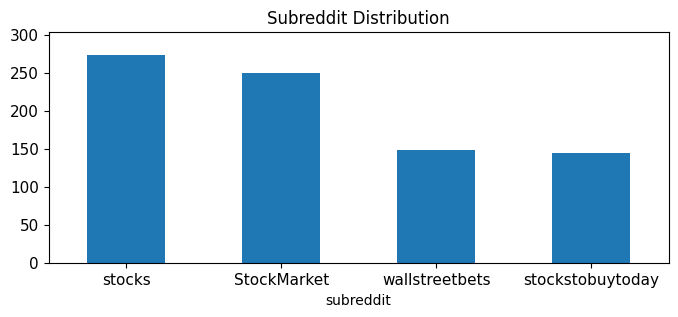

In [97]:
# Exercise 7?: Plot the subreddit distribution
print(df.subreddit.value_counts())
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit Distribution',
                                    ylim = [0, df.subreddit.value_counts().max() + 30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Data Preprocessing

In [98]:

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

count_vect.get_feature_names_out()[3123]

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3222))	1


'recreation'

In [99]:
# Exercise 9: Analyze the first record
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

In [100]:
# Exercise 10 
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [101]:
row = df_counts[3]
nonzero_indices = row.nonzero()[1]
feature_names = count_vect.get_feature_names_out()
word = feature_names[nonzero_indices[0]]
print(word)

on


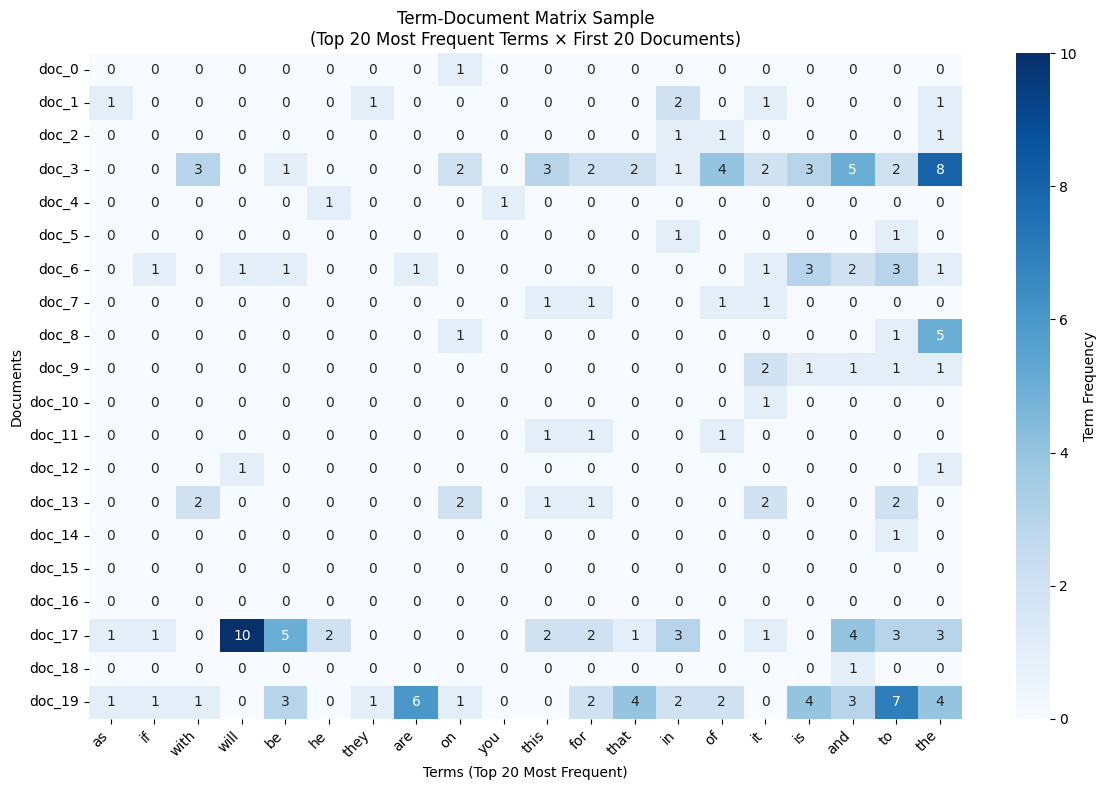

"\nThis visualization approach focuses on the most commonly occurring terms\nin the document collection because they offer superior insights into the\noverall data characteristics. By concentrating on high-frequency terms,\nwe can identify meaningful patterns in word usage across documents,\nrather than being overwhelmed by rare terms that appear in very few\ndocuments. This selective approach provides a clearer representation\nof the dataset's linguistic content and structure.\n"

In [102]:
# Exercise 11

# Calculate term frequencies across all documents
term_frequencies = np.array(df_counts.sum(axis=0)).flatten()

# Get indices of the top 20 most frequent terms
top_20_indices = term_frequencies.argsort()[-20:]

# Extract the vocabulary for these top 20 terms
top_20_terms = count_vect.get_feature_names_out()[top_20_indices]

# Create a sample matrix: first 20 documents × top 20 terms
sample_matrix = df_counts[:20, top_20_indices].toarray()

# Create DataFrame for visualization
df_sample = pd.DataFrame(
    sample_matrix, 
    columns=top_20_terms,
    index=[f"doc_{i}" for i in range(20)]
)

# Create heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_sample, 
    cmap="Blues", 
    annot=True, 
    fmt="d",
    cbar_kws={'label': 'Term Frequency'}
)

plt.title('Term-Document Matrix Sample\n(Top 20 Most Frequent Terms × First 20 Documents)')
plt.xlabel('Terms (Top 20 Most Frequent)')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

"""
This visualization approach focuses on the most commonly occurring terms
in the document collection because they offer superior insights into the
overall data characteristics. By concentrating on high-frequency terms,
we can identify meaningful patterns in word usage across documents,
rather than being overwhelmed by rare terms that appear in very few
documents. This selective approach provides a clearer representation
of the dataset's linguistic content and structure.
"""


In [104]:
# Exercise 12
import plotly.express as px

# Calculate word occurrence counts across the entire document collection
word_counts = np.array(df_counts.sum(axis=0)).flatten()

# Choose the first 300 vocabulary items (adjustable to 50/100 for better performance)
vocabulary_items = count_vect.get_feature_names_out()[:300]
word_frequencies = word_counts[:300]

# Generate an interactive frequency visualization
chart = px.bar(
    x=vocabulary_items,
    y=word_frequencies,
    labels={'x': "Vocabulary Terms", 'y': "Occurrence Count"},
    title="Frequency Distribution of Top 300 Vocabulary Terms",
)

# Improve label readability by rotating them
chart.update_layout(xaxis_tickangle=90, width=1200, height=600)

chart.show()

In [105]:
# Exercise 13
word_occurrence_counts = np.array(df_counts.sum(axis=0)).flatten()

selected_count = 50
most_common_indices = word_occurrence_counts.argsort()[-selected_count:]  # positions of top N items
most_common_words = count_vect.get_feature_names_out()[most_common_indices]
word_counts_for_selection = word_occurrence_counts[most_common_indices]

import plotly.express as px

visualization = px.bar(
    x=most_common_words,
    y=word_counts_for_selection,
    labels={'x': "Vocabulary Items", 'y': "Occurrence Count"},
    title=f"Most Frequent {selected_count} Terms in Document Collection"
)
visualization.update_layout(xaxis_tickangle=90, width=900, height=500)
visualization.show()


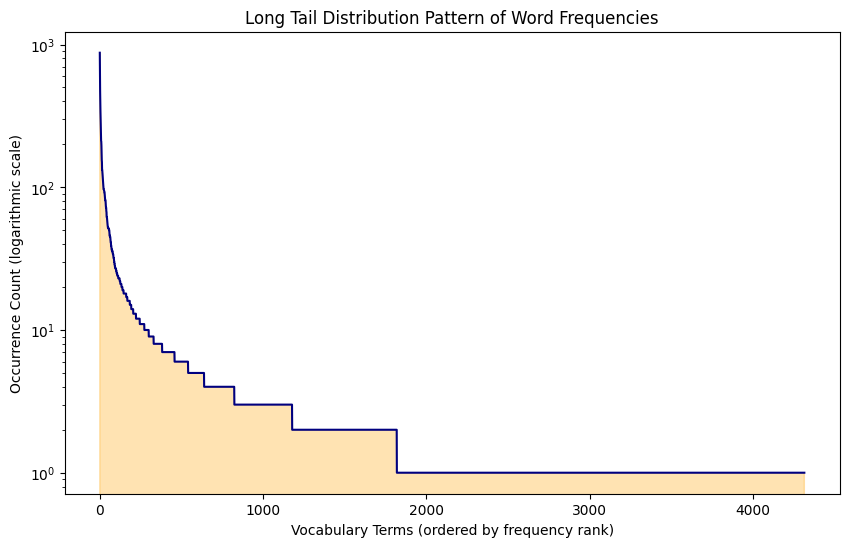

In [109]:
# Exercise 14
# Calculate word occurrence counts across all documents
word_counts = np.array(df_counts.sum(axis=0)).flatten()

# Arrange in descending order of frequency
descending_counts = np.sort(word_counts)[::-1]

# Create long tail distribution visualization
plt.figure(figsize=(10,6))
plt.plot(descending_counts, color="navy")
plt.fill_between(range(len(descending_counts)), descending_counts, alpha=0.3, color="orange")

plt.yscale("log")  # logarithmic scale reveals the long tail pattern more clearly
plt.title("Long Tail Distribution Pattern of Word Frequencies")
plt.xlabel("Vocabulary Terms (ordered by frequency rank)")
plt.ylabel("Occurrence Count (logarithmic scale)")
plt.show()

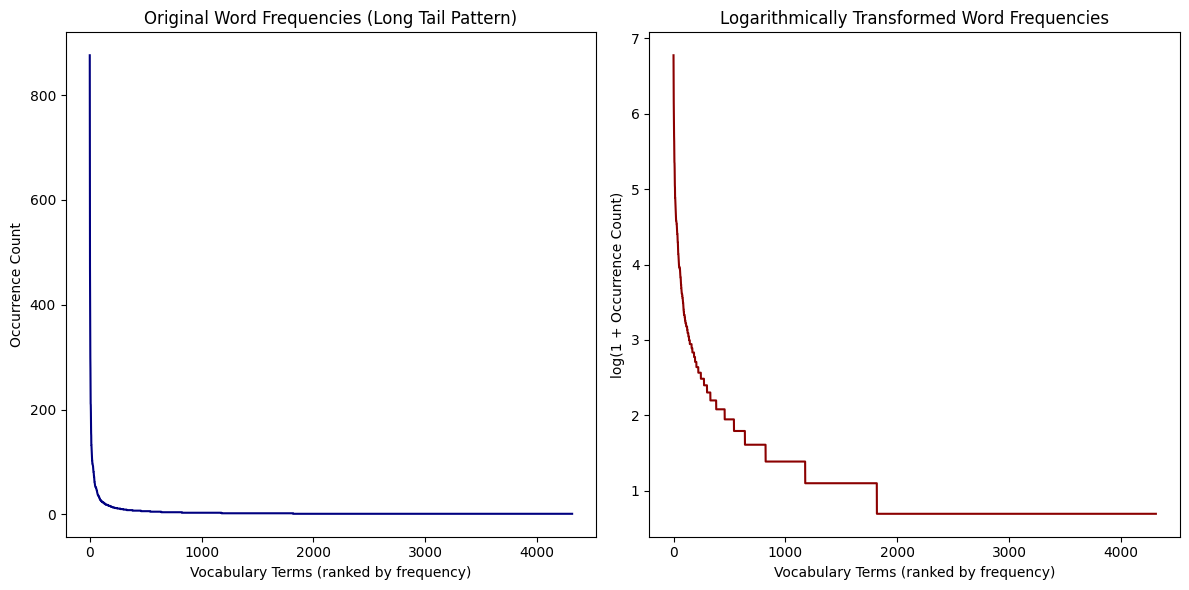

'\nThe original distribution is heavily skewed by a small number of extremely common words,\nmaking it difficult to observe the extended tail of less common vocabulary items.\nThe logarithmically transformed visualization compresses the high-frequency values\nand amplifies the low-frequency values, exposing greater detail in the long tail region.\n'

In [111]:
# Exercise 15
# Calculate word occurrence counts across all documents
word_counts = np.array(df_counts.sum(axis=0)).flatten()
descending_counts = np.sort(word_counts)[::-1]

# Apply logarithmic transformation (log1p prevents log(0) problems)
log_transformed_counts = np.log1p(descending_counts)

# Create side-by-side comparison visualization
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(descending_counts, color="navy")
plt.title("Original Word Frequencies (Long Tail Pattern)")
plt.xlabel("Vocabulary Terms (ranked by frequency)")
plt.ylabel("Occurrence Count")

plt.subplot(1,2,2)
plt.plot(log_transformed_counts, color="darkred")
plt.title("Logarithmically Transformed Word Frequencies")
plt.xlabel("Vocabulary Terms (ranked by frequency)")
plt.ylabel("log(1 + Occurrence Count)")

plt.tight_layout()
plt.show()

"""
The original distribution is heavily skewed by a small number of extremely common words,
making it difficult to observe the extended tail of less common vocabulary items.
The logarithmically transformed visualization compresses the high-frequency values
and amplifies the low-frequency values, exposing greater detail in the long tail region.
"""

### Correlation Heatmap

In [113]:
# Create a new feature
df["text_length"] = df["text"].str.len()

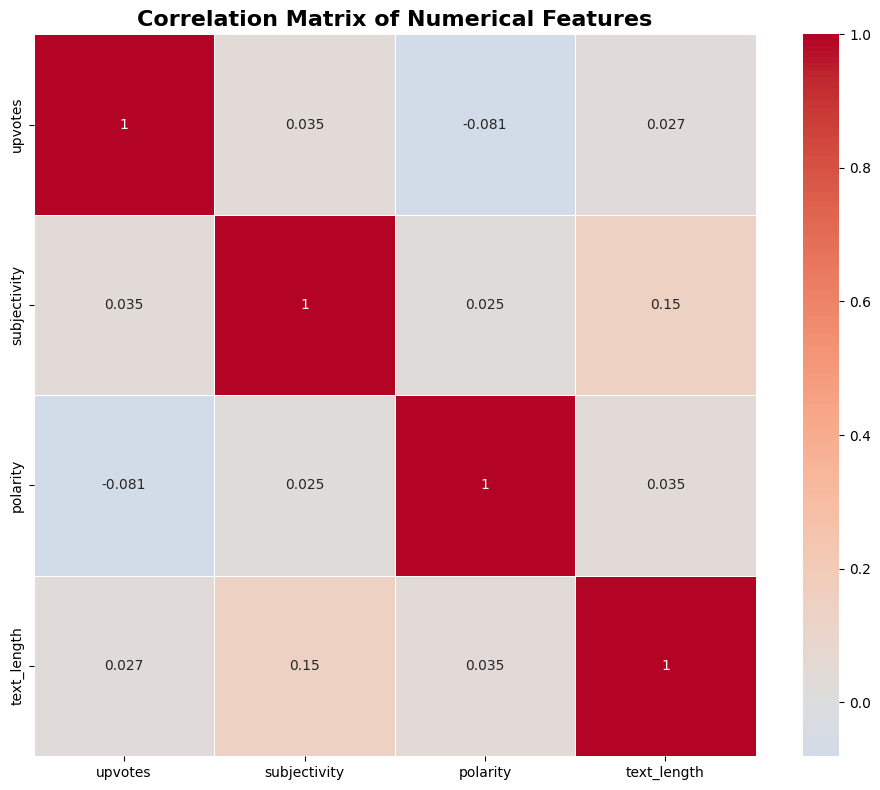

In [114]:
# Create correlation analysis for numerical features
numerical_features = ['upvotes', 'subjectivity', 'polarity', 'text_length']

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

All pairwise correlations are tiny (≈ −0.08 to +0.15), so there’s no strong linear link between upvotes and sentiment (polarity/subjectivity) or text length, and only a weak hint that longer texts are slightly more subjective (~0.15). That suggests (1) effects, if any, are small; (2) relationships may be non-linear or masked by confounders (subreddit, time of day, ticker, author karma)

### Sentiment Distribution by Subreddit

<Figure size 1200x800 with 0 Axes>

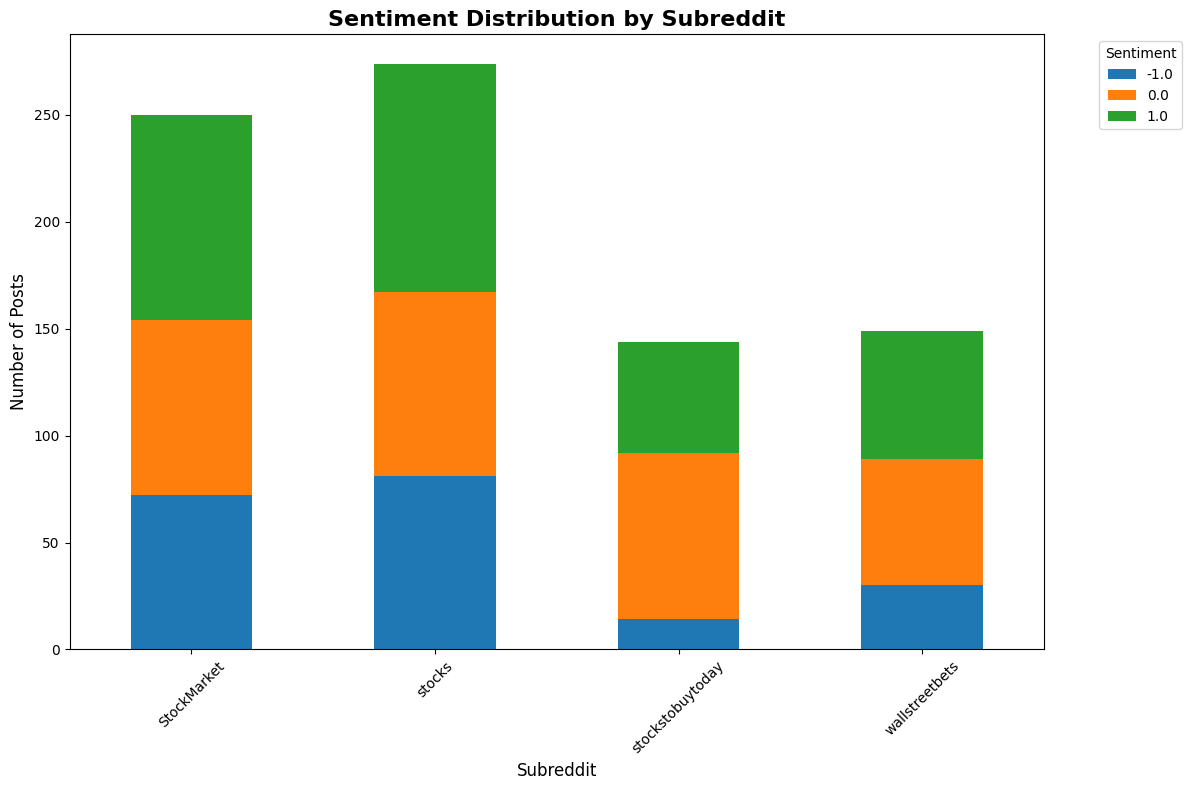

In [115]:
# Create a grouped bar chart showing sentiment distribution by subreddit
plt.figure(figsize=(12, 8))

# Create cross-tabulation
sentiment_subreddit = pd.crosstab(df['subreddit'], df['sentiment'])
sentiment_subreddit.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Sentiment Distribution by Subreddit', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Across all four subreddits the mood skews net positive, with r/stocks and r/StockMarket carrying the most volume and the largest counts of positive posts, r/stocksbuytoday showing the lowest negativity and a neutral-heavy, news-like tone, and r/wallstreetbets displaying a balanced split between neutral and positive with relatively few negatives; in short, bullish sentiment dominates—especially in r/stocks—while r/stocksbuytoday offers the calmest signal, and r/wallstreetbets remains upbeat but punchy; note this is a snapshot based on post counts (not intensity) and can shift with market news.

### Text Length Analysis

<Figure size 1200x800 with 0 Axes>

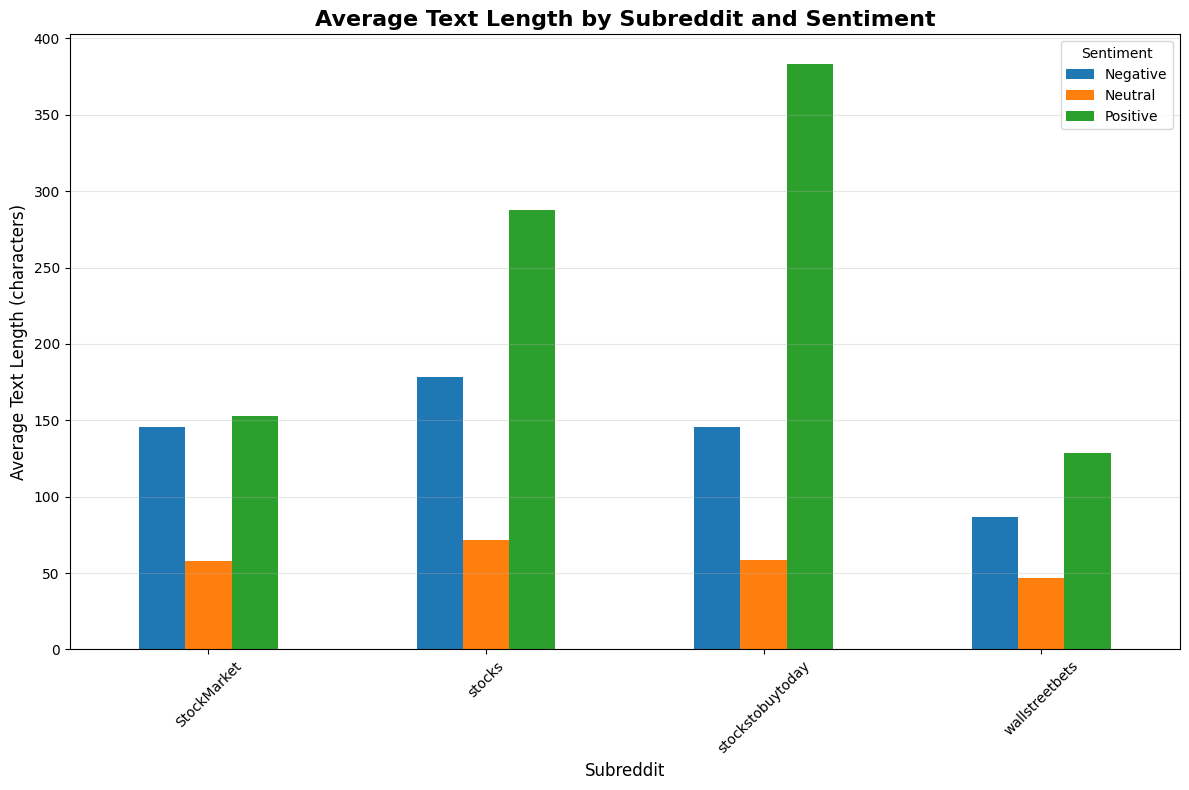

Average Text Length by Subreddit and Sentiment:
sentiment          -1.0   0.0    1.0
subreddit                           
StockMarket       145.8  57.9  152.9
stocks            178.1  71.5  287.6
stockstobuytoday  145.8  58.5  383.5
wallstreetbets     86.5  46.9  128.6


In [120]:
# Calculate average text length by sentiment and subreddit
avg_length = df.groupby(['subreddit', 'sentiment'])['text_length'].mean().unstack()

# Create the visualization
plt.figure(figsize=(12, 8))
avg_length.plot(kind='bar', figsize=(12, 8))

plt.title('Average Text Length by Subreddit and Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Average Text Length (characters)', fontsize=12)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the actual values for reference
print("Average Text Length by Subreddit and Sentiment:")
print(avg_length.round(1))

Positive posts are consistently the longest across all subreddits, neutral posts are the shortest, and negatives sit in between, most dramatically on r/stocksbuytoday, where positive texts are several times longer than neutral/negative ones. Subreddit style also matters: r/wallstreetbets is the most concise across sentiments, while r/stocks and r/stocksbuytoday feature much longer positive posts (and r/stocks has relatively long negatives, too). Together this suggests that longer, more detailed messages tend to be positive, but the strength of that pattern varies by community.

# Phase 2